In [27]:
!pip install catboost

Defaulting to user installation because normal site-packages is not writeable


In [28]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR

# Model selection
from sklearn.model_selection import RandomizedSearchCV

# External regressors
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [30]:
df=pd.read_csv('data/stud.csv')

In [31]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [32]:
x=df.drop(columns=['math score'],axis=1)

In [33]:
y=df['math score']

In [34]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [35]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [36]:
num_fearures=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()
preprocesser=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_fearures),
    ]
)

In [37]:
x=preprocesser.fit_transform(x)

In [38]:
x.shape

(1000, 19)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [40]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mse=mean_squared_error(true,predicted)
    rmse=np.sqrt(mse)
    r2=r2_score(true,predicted)
    return mae,rmse,r2


In [45]:
models={
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "Lasso":Lasso(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(), 
    "SVR":SVR(),
    "CatBoostRegressor":CatBoostRegressor(verbose=0),
    "XGBRegressor":XGBRegressor()
}
model_list=[]
r2_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)
    y_train_pred=model.predict(x_train)
    y_test_pred=model.predict(x_test)

    model_train_mae,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Performance for Training set: ")
    print("-Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("-R2 score: {:.4f}".format(model_train_r2))
    print("--------------------------------------")
    print("Model Performance for Test set: ")
    print("-Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("-Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("-R2 score: {:.4f}".format(model_test_r2))
    print("======================================")
    r2_list.append(model_test_r2)

LinearRegression
Model Performance for Training set: 
-Root Mean Squared Error: 5.3231
-Mean Absolute Error: 4.2667
-R2 score: 0.8743
--------------------------------------
Model Performance for Test set: 
-Root Mean Squared Error: 5.3940
-Mean Absolute Error: 4.2148
-R2 score: 0.8804
Ridge
Model Performance for Training set: 
-Root Mean Squared Error: 5.3233
-Mean Absolute Error: 4.2650
-R2 score: 0.8743
--------------------------------------
Model Performance for Test set: 
-Root Mean Squared Error: 5.3904
-Mean Absolute Error: 4.2111
-R2 score: 0.8806
Lasso
Model Performance for Training set: 
-Root Mean Squared Error: 6.5938
-Mean Absolute Error: 5.2063
-R2 score: 0.8071
--------------------------------------
Model Performance for Test set: 
-Root Mean Squared Error: 6.5197
-Mean Absolute Error: 5.1579
-R2 score: 0.8253
KNeighborsRegressor
Model Performance for Training set: 
-Root Mean Squared Error: 5.7077
-Mean Absolute Error: 4.5167
-R2 score: 0.8555
---------------------------

In [46]:
result_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score'])
result_df = result_df.sort_values(by='R2 Score', ascending=False)

In [47]:
result_df

,Model,R2 Score
1,Ridge,0.880593
0,LinearRegression,0.880433
8,CatBoostRegressor,0.851632
5,RandomForestRegressor,0.850090
6,AdaBoostRegressor,0.845000
9,XGBRegressor,0.827797
2,Lasso,0.825320
3,KNeighborsRegressor,0.783813
7,SVR,0.728600
4,DecisionTreeRegressor,0.712766


Linear regression

In [49]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred=lin_model.predict(x_test)
score=r2_score(y_test,y_pred)
print("Linear Regression R2 Score: ", score)

Linear Regression R2 Score:  0.8804332983749565


plot y_pred and y_test

Text(0, 0.5, 'Predicted Values')

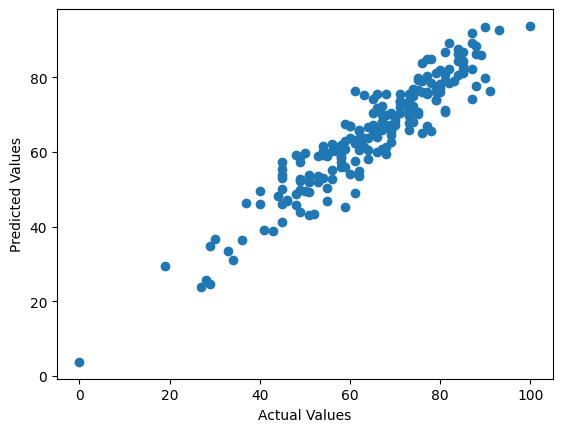

In [50]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values") 
plt.ylabel("Predicted Values")

diff b/w actual and predicted values

In [51]:
pred_df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Difference': y_test - y_pred})

In [52]:
pred_df

,Actual,Predicted,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
